# PROBLEM STATEMENT:
#### This project is designed with the scope of predicting the Air Quality Index (AQI) of various countries using features such as Date, **Country, and **Air Quality Status (for example, Good, Moderate, Unhealthy). The developed machine learning models will be used to accurately predict AQI values as well as understand the patterns of pollution. Successful prediction will help governments and organizations take the required steps at the right time in the light of air pollution.


# Step 1 :Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree



 # Step 2 : Load Dataset

In [5]:
#load the data set
dataset = pd.read_csv(r"C:\Users\ajith\OneDrive\Desktop\CU\airqualitydataset\data_date.csv")

In [6]:
#data set
dataset

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
15316,2024-09-26,United States of America,Unhealthy for Sensitive Groups,114
15317,2024-09-26,Uzbekistan,Unhealthy,157
15318,2024-09-26,Vatican,Good,30
15319,2024-09-26,Venezuela,Good,10


In [7]:
#displaying the head of the data set
dataset.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [8]:
#displaying the tail of data set
dataset.tail()


,Date,Country,Status,AQI Value
15316,2024-09-26,United States of America,Unhealthy for Sensitive Groups,114
15317,2024-09-26,Uzbekistan,Unhealthy,157
15318,2024-09-26,Vatican,Good,30
15319,2024-09-26,Venezuela,Good,10
15320,2024-09-26,Vietnam,Moderate,87


In [9]:
#dataset shape
dataset.shape

(15321, 4)

# Step 3 : Data Preprocessing 


In [11]:
#Removing unwanted columns
dataset_cleaned = dataset.drop(['Date'],axis = 1)

In [103]:
dataset_cleaned['AQI Value'].value_counts()

AQI Value
25     244
15     238
33     231
46     214
65     209
      ... 
283      1
282      1
370      1
214      1
328      1
Name: count, Length: 314, dtype: int64

In [12]:
#check for missing values
dataset_cleaned.isnull().sum()

Country      0
Status       0
AQI Value    0
dtype: int64

In [13]:
#data set
dataset_cleaned.head()

,Country,Status,AQI Value
0,Albania,Good,14
1,Algeria,Moderate,65
2,Andorra,Moderate,55
3,Angola,Unhealthy for Sensitive Groups,113
4,Argentina,Moderate,63


In [127]:
dataset_cleaned.describe()

,Country,Status,AQI Value
count,15321.000000,15321.000000,15321.000000
mean,70.469291,1.280269,61.776516
std,41.009102,1.387856,48.592194
min,0.000000,0.000000,1.000000
25%,35.000000,0.000000,29.000000
50%,71.000000,2.000000,52.000000
75%,105.000000,2.000000,81.000000
max,141.000000,5.000000,963.000000


In [115]:
dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Country    15321 non-null  int32
 1   Status     15321 non-null  int32
 2   AQI Value  15321 non-null  int64
dtypes: int32(2), int64(1)
memory usage: 239.5 KB


In [117]:
dataset_cleaned.dtypes

Country      int32
Status       int32
AQI Value    int64
dtype: object

# Step 4: Exploratory Data Analysis

### 2. Distribution of AQI Values

Text(0.5, 1.0, 'Distribution of AQI Values')

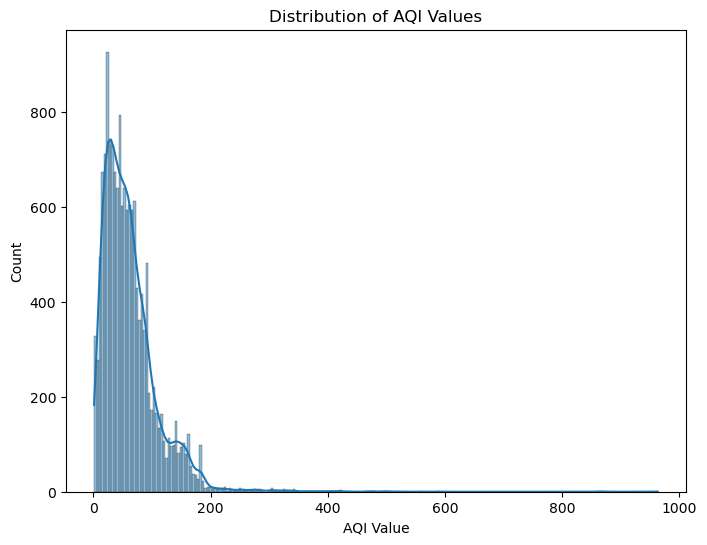

In [18]:
# Distribution of AQI values
plt.figure(figsize=(8, 6))
sns.histplot(dataset_cleaned['AQI Value'], kde=True)
plt.title('Distribution of AQI Values')

### 3.Histoplot of status

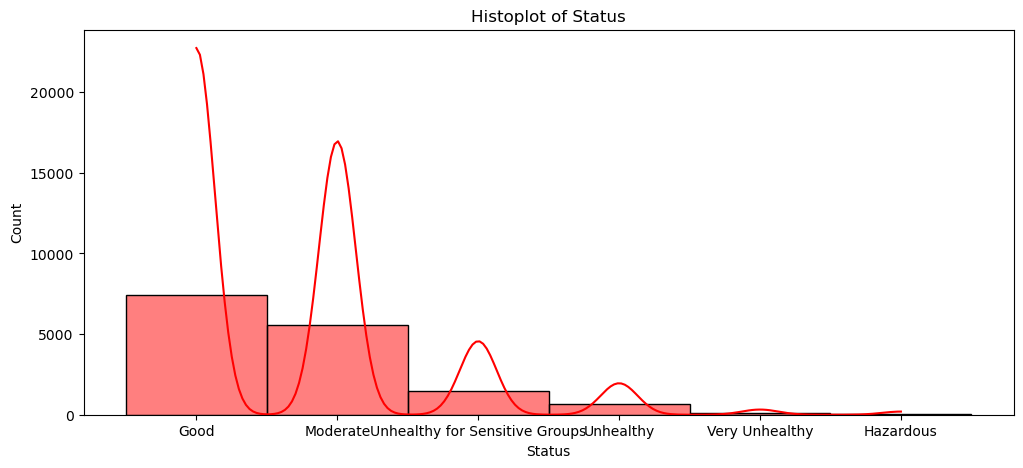

In [20]:
#histoplot of status
plt.figure(figsize=(12,5))
sns.histplot(dataset_cleaned['Status'],bins=10,kde=True,color='red')
plt.title('Histoplot of Status')
plt.show()

### 4. Histoplot for AQI Value

Text(0.5, 0, 'AQI Value')

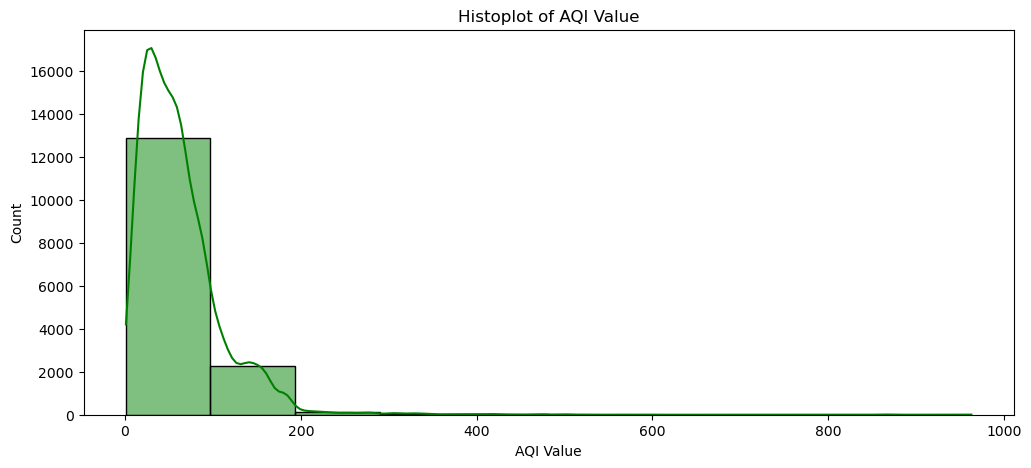

In [22]:
#histoplot for AQI Value
plt.figure(figsize=(12,5))
sns.histplot(dataset_cleaned['AQI Value'],bins=10,kde=True,color='green')
plt.title('Histoplot of AQI Value')
plt.xlabel('AQI Value')


### 5. AQI values by air quality status

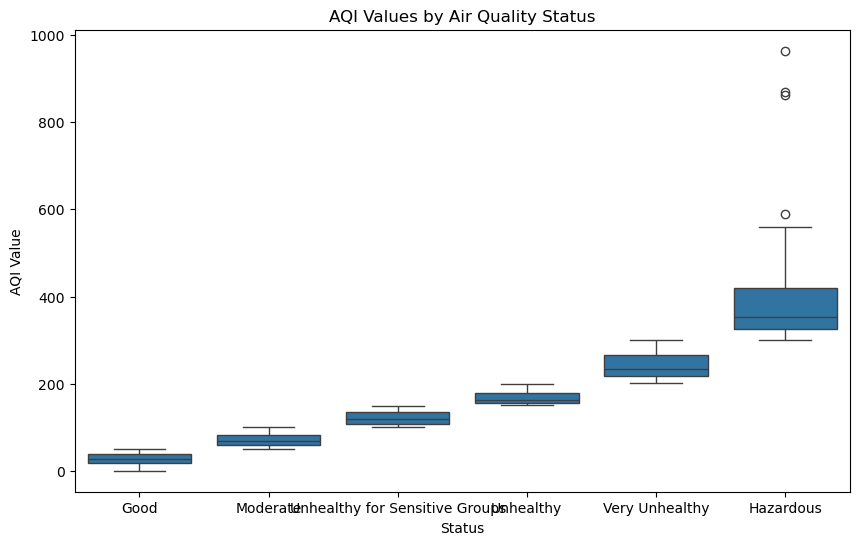

In [24]:
# Boxplot of AQI values by Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='AQI Value', data=dataset_cleaned)
plt.title('AQI Values by Air Quality Status')
plt.show()

### 6.boxplot for AQI Distribution by Country

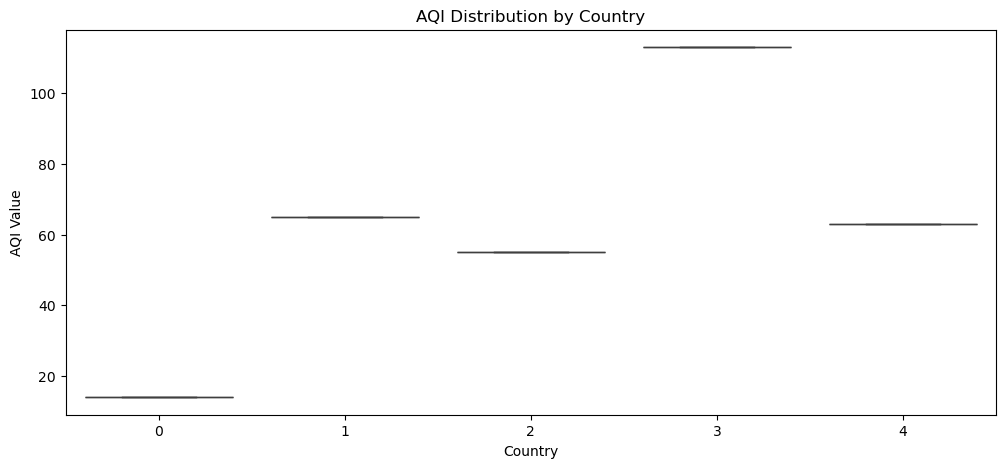

In [146]:
#boxplot for AQI Distribution by Country
plt.figure(figsize=(12, 5))
h= dataset_cleaned.head()
sns.boxplot(y='AQI Value', x='Country', data=h)
plt.title('AQI Distribution by Country')
plt.show()

### 7.Barplot of AQI Value by country

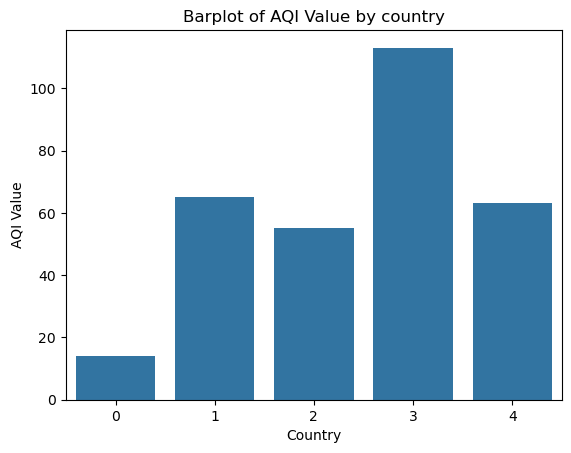

In [148]:
#barplot
h= dataset_cleaned.head()
sns.barplot(x='Country',x='AQI Value',data=h)
plt.title('Barplot of AQI Value by country')
plt.show()

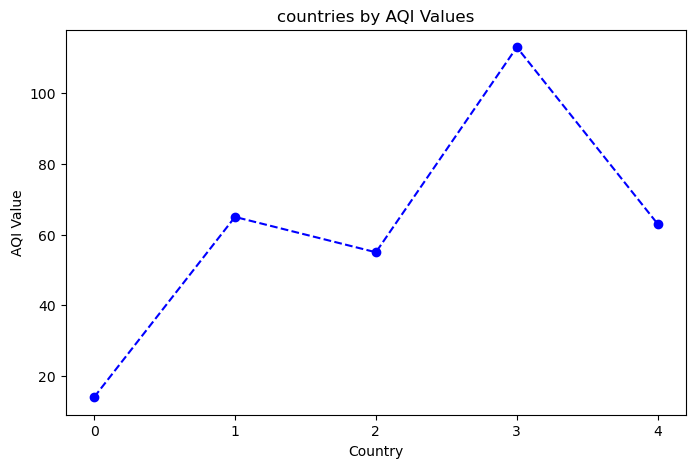

In [176]:
h= dataset_cleaned.head()
plt.figure(figsize=(8, 5))
plt.plot(h['Country'], h['AQI Value'], marker='o', linestyle='--', color='b')
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.title('countries by AQI Values')
plt.xticks(h['Country'])
plt.show()


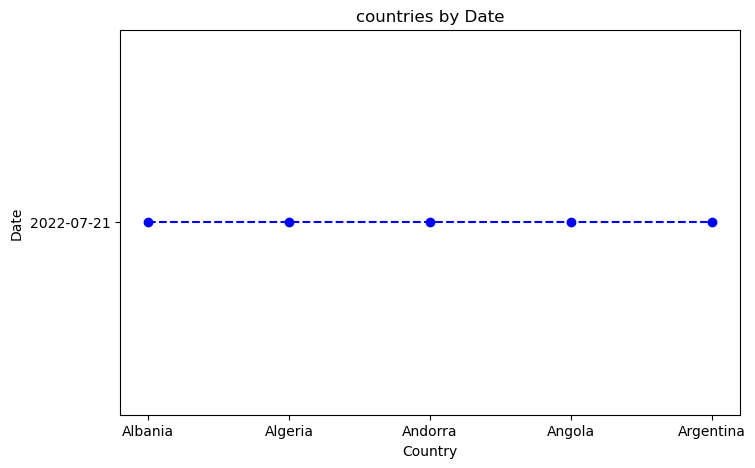

In [180]:
h= dataset.head()
plt.figure(figsize=(8, 5))
plt.plot(h['Country'], h['Date'], marker='o', linestyle='--', color='b')
plt.xlabel('Country')
plt.ylabel('Date')
plt.title('countries by Date')
plt.xticks(h['Country'])
plt.show()

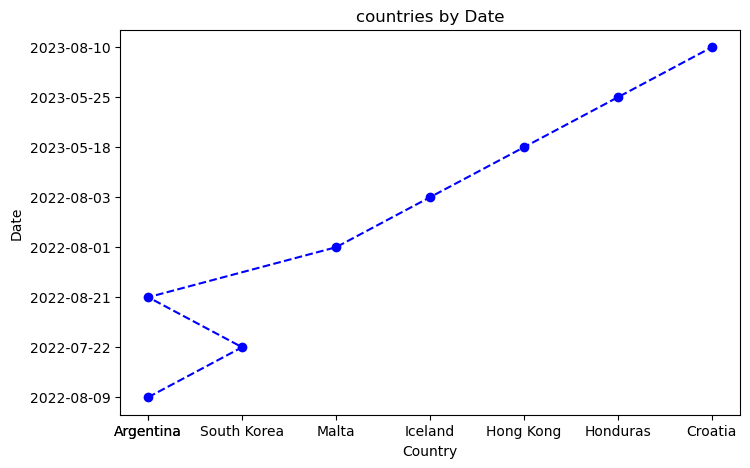

In [190]:
h= dataset.sample(n=8)
plt.figure(figsize=(8, 5))
plt.plot(h['Country'], h['Date'], marker='o', linestyle='--', color='b')
plt.xlabel('Country')
plt.ylabel('Date')
plt.title('countries by Date')
plt.xticks(h['Country'])
plt.show()

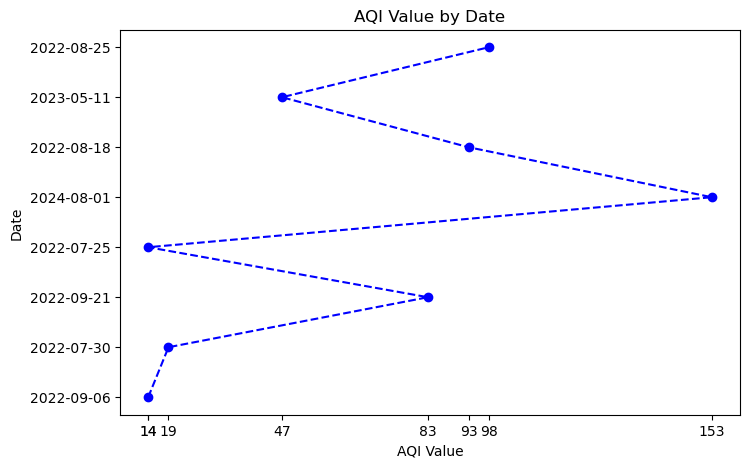

In [192]:
h= dataset.sample(n=8)
plt.figure(figsize=(8, 5))
plt.plot(h['AQI Value'], h['Date'], marker='o', linestyle='--', color='b')
plt.xlabel('AQI Value')
plt.ylabel('Date')
plt.title('AQI Value by Date')
plt.xticks(h['AQI Value'])
plt.show()

### 8.SCATTERPLOT

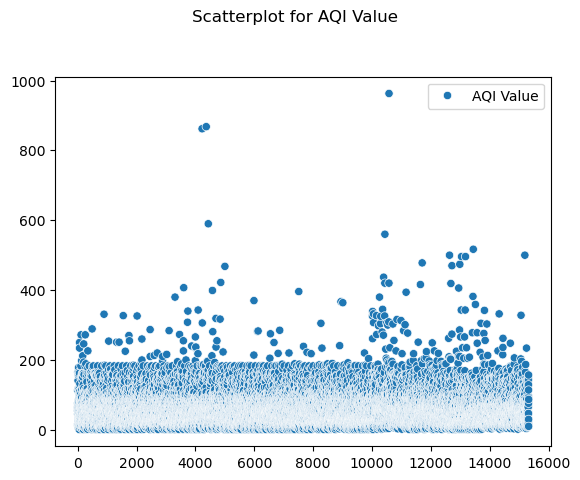

In [125]:
#  scatterplot for AQI Value
sns.scatterplot(dataset_cleaned[['AQI Value']])
plt.suptitle('Scatterplot for AQI Value', y=1.02)
plt.show()


### A correlation matrix only makes sense when you have two or more numerical columns to compute correlations between corelation heat map.

# Step 5 : Feature Engineering

In [33]:
# Encoding categorical features using LabelEncoder
label_encoders = {}
for column in dataset_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset_cleaned[column] = le.fit_transform(dataset_cleaned[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset_cleaned)

# Convert back to a DataFrame for better readability
data = pd.DataFrame(scaled_features, columns=dataset_cleaned.columns)
print(data.head())


    Country    Status  AQI Value
0 -1.718438 -0.922510  -0.983246
1 -1.694052  0.518609   0.066340
2 -1.669667  0.518609  -0.139461
3 -1.645281  1.959728   1.054185
4 -1.620895  0.518609   0.025179


Note :-
Not used MinMaxscaler  because : Since StandardScaler preserves both positive and negative values and ensures that the transformed data retains the original spread, it becomes essential if you're working with algorithms like SVM or Linear Regression, which are sensitive to such distributions.


# Step 6 : Divide the Data into X and Y variables 

In [36]:
# Define X by dropping the target column
X = data.drop('AQI Value', axis=1)

# Define Y as the target column
Y = data['AQI Value']


# Step 7 : Split the data set into Train and Test data 

In [38]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Step 8 : Train the Model using different ML algorithms 

### 1.Simple linear Regression

In [41]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

### 2.Decision Tree Regressor

In [43]:
DT =  DecisionTreeRegressor(max_depth=5,max_leaf_nodes=15)
model = DT.fit(X_train,Y_train)
model

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=15)

### Visualize the decision tree

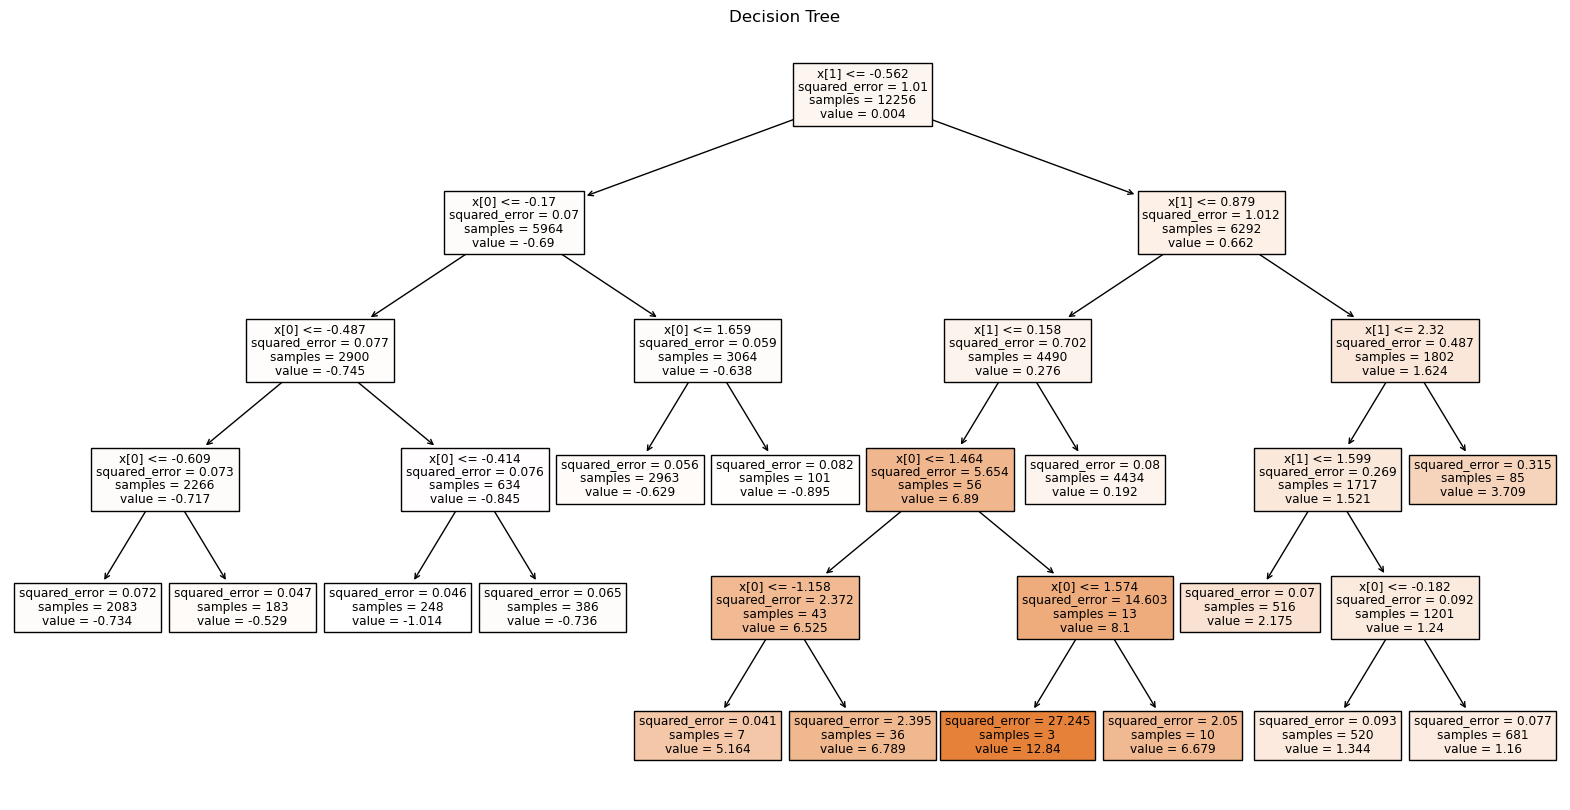

In [45]:

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.title("Decision Tree")
plt.show()

### 3.KNeighborsRegressor

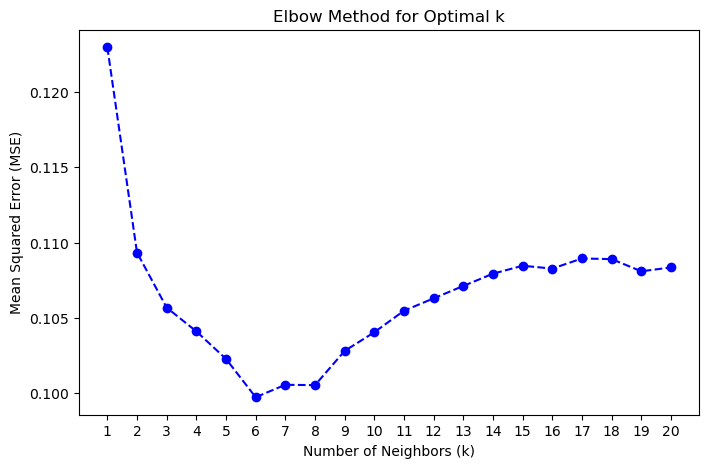

In [47]:
# Define a range of k values to test
k_values = range(1, 21)
mse_values = []  # Store the Mean Squared Error for each k

# Loop through k values and train the KNN model for each one
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate Mean Squared Error and store it
    mse = mean_squared_error(Y_test, y_pred)
    mse_values.append(mse)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()


In [48]:
KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

### 4.Support Vector Machine (SVM) Regressor

In [50]:
#The parameter kernel='rbf' in SVR (Support Vector Regression) refers to the Radial Basis Function (RBF) kernel
#Meaning of RBF Kernel:
#The RBF kernel measures the similarity between two data points based on their distance. 
#If two points are close to each other, the similarity is high. If they are far apart, the similarity decreases exponentially.
#by using poly we get very low accuracy like 0.4
#by using linear we get very low accuracy like 0.4

SVM = SVR(kernel='rbf')
SVM.fit(X_train, Y_train)

SVR()

### 5. Random Forest Regressor

In [52]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
#This parameter "n_estimators " specifies the number of trees in the forest.
#More trees can improve the model’s performance but also increase training time.
RFR.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

# Step 9 : prediction of data 

### 1.Simple linear Regression

In [55]:
regressor_Y_pred = regressor.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,regressor_Y_pred], columns = ["Original AQI Value","Predicted AQI Value"])
calculation

,Original AQI Value,Predicted AQI Value
0,-1.065566,-0.698749
1,-1.065566,-0.686414
2,2.042030,0.927105
3,1.939130,0.939198
4,0.375041,0.393780
...,...,...
3060,-0.201202,0.380961
3061,0.436782,0.407808
3062,-0.221782,0.385798
3063,0.601422,0.397892


### 2.Decision Tree Regressor

In [57]:
DT_Y_pred = DT.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,DT_Y_pred], columns = ["Original AQI Value","Predicted AQI Value"])
calculation

,Original AQI Value,Predicted AQI Value
0,-1.065566,-0.736285
1,-1.065566,-0.629203
2,2.042030,2.174684
3,1.939130,2.174684
4,0.375041,0.192410
...,...,...
3060,-0.201202,0.192410
3061,0.436782,0.192410
3062,-0.221782,0.192410
3063,0.601422,0.192410


### 3.KNeighborsRegressor

In [59]:
KNN_Y_pred = KNN.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,KNN_Y_pred], columns = ["Original AQI Value","Predicted AQI value"])
calculation

,Original AQI Value,Predicted AQI value
0,-1.065566,-0.818605
1,-1.065566,-1.010686
2,2.042030,2.045460
3,1.939130,2.035170
4,0.375041,0.642583
...,...,...
3060,-0.201202,-0.125741
3061,0.436782,0.436782
3062,-0.221782,0.515672
3063,0.601422,0.272141


### 4.Support Vector Machine (SVM) Regressor

In [61]:
SVM_Y_pred= SVM.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,SVM_Y_pred], columns = ["Original AQI Value","Predicted AQI Value"])
calculation

,Original AQI Value,Predicted AQI Value
0,-1.065566,-0.749960
1,-1.065566,-0.630068
2,2.042030,1.997974
3,1.939130,2.035732
4,0.375041,0.145439
...,...,...
3060,-0.201202,0.074441
3061,0.436782,0.201293
3062,-0.221782,0.152163
3063,0.601422,0.169504


### 5. Random Forest Regressor

In [63]:
RFR_Y_pred = RFR.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,RFR_Y_pred], columns = ["Original AQI Value","Predicted AQI Value"])
calculation

,Original AQI Value,Predicted AQI Value
0,-1.065566,-0.826989
1,-1.065566,-1.007617
2,2.042030,2.103533
3,1.939130,2.172227
4,0.375041,0.614640
...,...,...
3060,-0.201202,-0.110083
3061,0.436782,0.429081
3062,-0.221782,0.394197
3063,0.601422,0.276895


# Step 10 : Model Evaluation Matrix

In [65]:


def evaluate_model(Y_test ,Y_pred, model_name):
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    print(f"{model_name} Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2 Score): {r2}")
    print("\n")

# Evaluate Linear Regression
evaluate_model(Y_test, regressor_Y_pred, "Linear Regression")

# Evaluate Decision Tree
evaluate_model(Y_test, DT_Y_pred, "Decision Tree")

# Evaluate KNN
evaluate_model(Y_test, KNN_Y_pred, "KNN")

# Evaluate SVM
evaluate_model(Y_test, SVM_Y_pred, "SVM")

# Evaluate Random Forest
evaluate_model(Y_test, RFR_Y_pred, "Random Forest")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.3753653127677124
Mean Absolute Error (MAE): 0.32497256691170273
R-squared (R2 Score): 0.6082668115596284


Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.11800004175909429
Mean Absolute Error (MAE): 0.22965419274458224
R-squared (R2 Score): 0.8768545440345679


KNN Model Evaluation:
Mean Squared Error (MSE): 0.09973611313747216
Mean Absolute Error (MAE): 0.18413769572870087
R-squared (R2 Score): 0.8959148747285306


SVM Model Evaluation:
Mean Squared Error (MSE): 0.3012361986305074
Mean Absolute Error (MAE): 0.24757562956461981
R-squared (R2 Score): 0.6856283397815972


Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.09131478090248499
Mean Absolute Error (MAE): 0.17436730901290068
R-squared (R2 Score): 0.9047034207532101


